# 1-3 - Foundations and Core Concepts of PyTorch - Deep Learning Introduction

## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Deep Learning General Overview

- Type of machine learning
- Covers all learning types (supervised/unsupervised/reinforcement learning)
- Different architectures for different puposes
  - Fully-connected neural networks
  - Convolutional neural networks
  - Recurrent neural networks
- Inspired by the structure and funtioning of the human brain
- Use multiple layers for feature extraction
- Each layer uses data from previous layers
- Learn different levels of abstraction

### Computer Vision Tasks

- Classification
  - Algorithm recognizes a dog in the image
- Classification and Object Detection
  - Algorithm recognizes a dog in the image
  - Algorithm recognizes rectangular bounding box
- Object Detection
  - It recognizes a dog and cat in the image
  - It detects the rectangular location of dog/cat
- Semantic Segmentation
  - It recognizes pixelwise location of dog/cat

### Rrecurrent Neural Networks

- Can take the context of data into account
  - Time Series Prediction Forecasting
  - Text Generation / Machine Translation


### GANs and Style Transfer

- Images can be adapted or even created with a technique called **style transfer**
  - Input is 2 images. One image is to be transformed, the style of the second image dictates the style of the transformed image
- General Adversarial Networks are a very recent technique in which images can be created from scratch that are photo realistic
  - A so-called **generator** creates to images and trys to fool a so-called **discriminator**
  - With this technique, the quality of the predicted images can be increased

## Deep Learning Modeling 101

- Start with training data, $X$
- $X$ is fed to the **neural network** which consists of **layers**
  - This is the core of the algorithm or the engine of our model
  - As a result of these calculation, we get updated **weights** of the **nodes**
- The combination of data, neural network layers and weights results in a **prediction**
  - The prediction is $\hat{y}$
- $y$ is compared to $\hat{y}$ to evaluate the quality of the predictions
  - $y$ and $\hat{y}$ are inputs to the **loss function**
  - the loss fuction evaluates how well the model performs
  - there are different types of loss functions
  - the most appropriate loss function depends on the problem at hand
  - after evaluating the loss function, we get a **loss score**
  - this loss score is used for fine tuning the weights
- The **optimizer** applies a so-called **back propogation** algorithm and updates the weights
  - Initially, the weights are set randomly and the corresponding losses are high
  - With more training loops, the weights are adapted in a way that losses are decreased
  - When the loss function is **minimized**, the predictions are as close as possible to the true values
- We can feed new X values to our trained model to get predictions
  - The model must be evaluated using data it has never seen before


## Deep Learing Performance

- Classical ML techniques work best for small datasets
- With increasing size of the available data neural networks outperform classical techniques
- 4 Reasons why Deep Learning took off
  1. More data
  2. Hardware development
    - Moore's Law and more computing power (GPUs)
    - not so much for transistors on a chip, but Deep Learning has benefitted from GPU improvements
  3. Better algorithms
    - neural networks were developed many decades ago, but they gained popularity after Google opened up the development of **TensorFlow** and made it open source
  4. Open Source: the deep learning frameworks, Python and R

## From Perceptron to Neural Network


### Perceptron

<img src='../images/image0.png'/>

- The basic building block of a neural network
- Stacking several perceptrons in line will result in a multilayer perceptron, which is effectively a neural network
- A perceptron has 4 main parts:
  1. **Input features** (this is the input layer)
  2. Each feature gets multiplied by a **weight**
  3. All the weighted inputs are added together along with the **bias** ($w_0$) to shift the output
    - This results in a **weighted sum**
  4. This value (weighted sum) is passed to an **activation function**
    - This activation function may or may not activate
    - That depends on the weight of the sum and the activation function itself
    - The result is one output value
    - The activation function:

$$
\text{output} =
\begin{cases}
1, & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0 \\
0, & \text{otherwise}
\end{cases}
$$

In [2]:
# create a simple dataset
X = np.array([
    [2, 3],
    [1, 5],
    [2, 8],
    [5, 2],
    [7, 3],
    [6, 1]
])

# labels for the dataset
# 0 for "blue" and 1 for "red"
y = np.array([0, 0, 0, 1, 1, 1])

# initialize the weights and bias
w = np.random.randn(2)
b = 0
w, b

(array([ 0.98350437, -0.13306608]), 0)

In [3]:
# perceptron step function
def predict(X):
    # calculate the linear combination
    linear_combination = np.dot(X, w) + b
    # apply the step function
    return np.where(linear_combination >= 0, 1, 0)

Epoch 1, Weights: [ 0.78350437 -0.43306608], Bias: -0.1, Errors: 1
Epoch 2, Weights: [ 0.58350437 -0.73306608], Bias: -0.2, Errors: 1
Epoch 3, Weights: [ 0.58350437 -0.73306608], Bias: -0.2, Errors: 0
Converged after 3 epochs


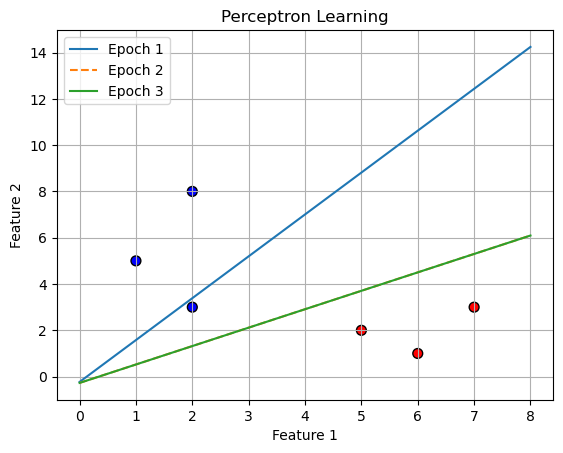

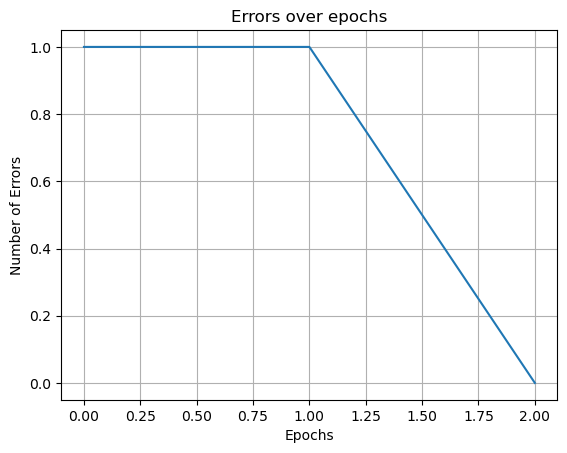

In [4]:
# plot points
fig, ax = plt.subplots()
colors = ['blue' if label == 0 else 'red' for label in y]
cmap_blues = plt.get_cmap('Blues')
ax.scatter(X[:, 0], X[:, 1], c=colors, s=50, edgecolor='k')


# Train the perceptron
learning_rate = 0.1
errors = []

# this updates the weights and bias 
#. one training example at a time
for epoch in range(20):
    total_error = 0
    for xi, yi in zip(X, y):
        y_pred = predict(xi) # predict based on the current w and b
        # update amount can be zero, negative or positive
        update = learning_rate * (yi - y_pred)
        w += update * xi # ajust weights
        b += update      # adjust bias
        total_error += int(update != 0) # count the number of errors
    errors.append(total_error)
    print(f'Epoch {epoch+1}, Weights: {w}, Bias: {b}, Errors: {total_error}')

    # plot the decision boundary
    x_values = np.linspace(0, 8, 100)
    y_values = -(w[0] * x_values + b) / w[1]
    if epoch % 2 == 0:  # plot every second epoch
        line_style = '-'
    else :
        line_style = '--'
    ax.plot(x_values, y_values, linestyle=line_style, label=f'Epoch {epoch+1}')

    if total_error == 0:
        print(f'Converged after {epoch+1} epochs')
        break
ax.legend()
plt.title('Perceptron Learning')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# plot the error over epochs
plt.plot(errors)
plt.title('Errors over epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid()
plt.show()

<img src='../images/image2.png'/>

- Above is a 2 layer. Typically, the input layer is not counted
- There are 3 input values, 4 hidden nodes and 3 output values

## Layer Types

### Input Layer

- Corresponds to independent variables
- Typically aken as batches
- Binned data must be transformed to numerical data
- Categorized data must be transformed to numerical data

### Dense Layer

<img src='../images/dense_layer.png'/>

- Each input later is connect to each output layer
- Also called fully connected layer
- Usually non-linear activation function applied

### 1D convolutional layer

<img src='../images/convolutional_layer.png'/>

- Layer consists of filters
- Sequentially a subset of input layer is processed
- All nodes of input layer used
- Typically, this layer is applied several times in convolutional neural networks, and followed by a **pooling layer**

### Recurrent Neural Networks

- Use recurrent cells
- Receive their own outpu with a delay
- Appled when context plays a role



### Long short-term memory (LSTM)

- Use "memory cell"
- Used for temporal sequences

### Output Layer

- For **Regression**
  - Nodes: 1
  - Output layer activation: Linear
- For **Multi-Target Regression**
  - Nodes: N (number of targets)
  - Output layer activation: Liner
- For **Binary Classification**
  - Nodes: 1
  - Output layer activation: Sigmoid
- For **Multi-Label Classification**
  - Nodes: N (number of labels)
  - Output layer activation: Softmax

## Activation Functions

### Rectified Linear Unit (ReLU)

- The most common activation function
- It is non-linear

$$
\text{ReLU(x)} = \max{(0, x)} = \frac{x + |x|}{2} = 
\begin{cases}
x, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

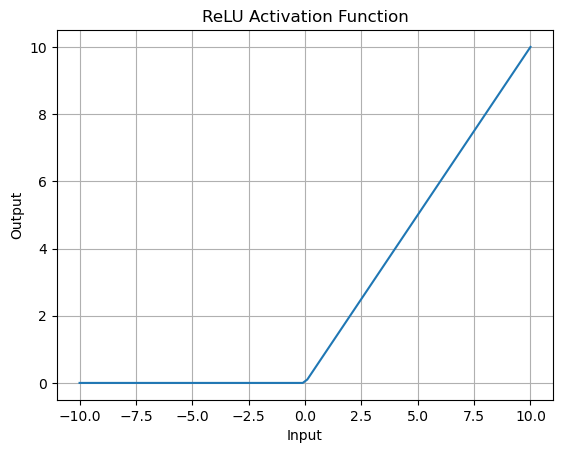

In [5]:
ReLU = lambda x: np.maximum(0, x)

x_values = np.linspace(-10, 10, 100)
y_values = ReLU(x_values)
plt.plot(x_values, y_values)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()

### Leaky Rectified Linear Unit (Leaky ReLU)

- $\alpha$ is typically 0.01
- Instead of zero for negative inputs, small gradiemt
- Gradient never 0

$$
\text{Leaky ReLU}(x) =
\begin{cases}
x, & \text{if } x \gt 0 \\
\alpha x, & \text{if } x \le 0
\end{cases}
$$

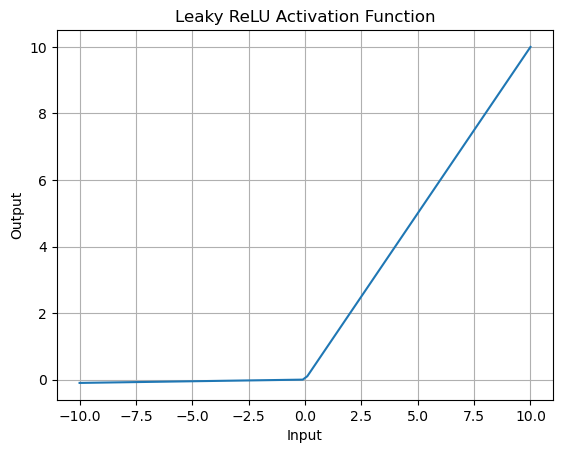

In [6]:
leaky_ReLU = lambda x, alpha: np.where(x > 0, x, alpha * x)

x_values = np.linspace(-10, 10, 100)
y_values = leaky_ReLU(x_values, 0.01)
plt.plot(x_values, y_values)
plt.title('Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.show()

### Hyperbolic Tangent

- Non-linear
- Relatively flat, except for small range
- Derivative small, except for small range
- Might suffer vanishing gradient probelm

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

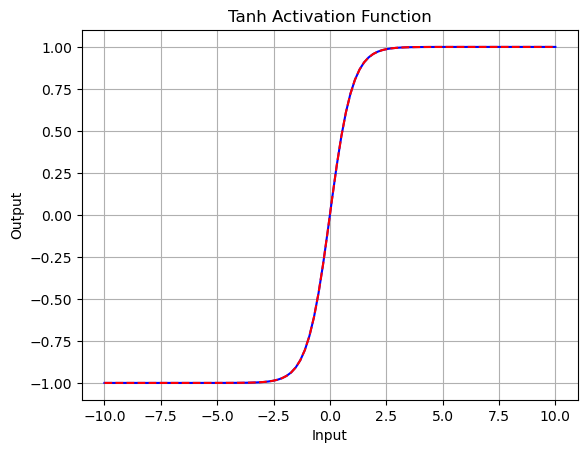

In [7]:
tanh = lambda x: np.tanh(x)
tanh_2 = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_values = tanh(x_values)
y_values_2 = tanh_2(x_values)

plt.plot(x_values, y_values, color='blue', label='tanh')
plt.plot(x_values, y_values_2, color='red', linestyle='--', label='tanh_2')

plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()                     
plt.show()

### Sigmoid

- Non-linear
- Relatively flat, except for small range
- Derivative small, except for small reange
- Might suffer vanishing gradient prlbem
- Result range from 0 to 1 (good choice for predicting probabilities)

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

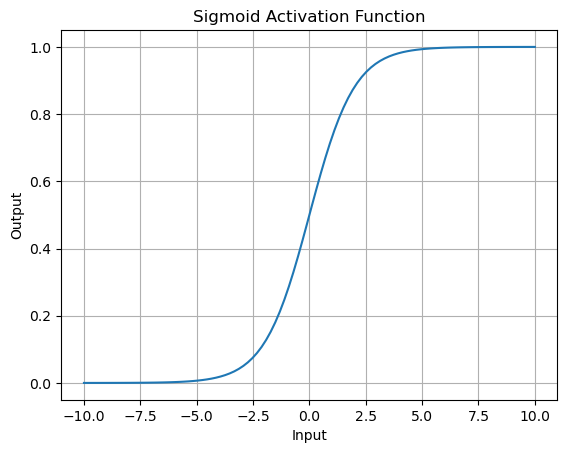

In [8]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)
plt.plot(x_values, y_values)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()

### Softmax

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

- $z_i$ is the input score for class $i$
- $K$ is the total number of classes
- The denominator is the sum of exponentials across all $K$ clases
- Softmax turns raw scores into probabilities that sum to 1
- Most often used for multiclass classification problems

Softmax is a little different because it’s a vector function, not a function from ℝ to ℝ like sigmoid or tanh.
It maps a vector of values to a vector of probabilities.

But you can still plot something softmax-like for visualization.

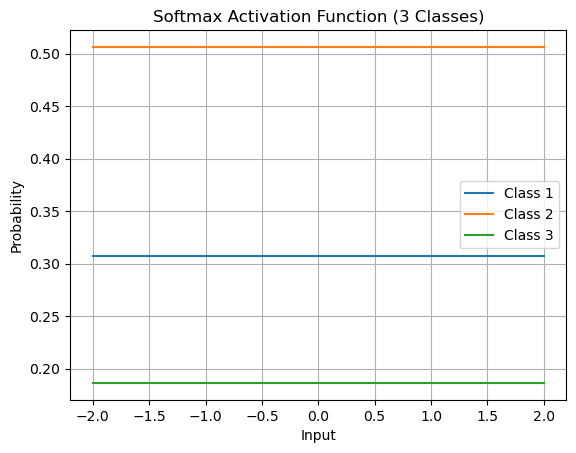

In [9]:
# Define softmax function
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)

# Generate input values
x_values = np.linspace(-2, 2, 100)

# Assume 3 "classes" (so we create 3 shifted versions of x)
scores = np.vstack([
    x_values,
    x_values + 0.5,
    x_values - 0.5
])

# Apply softmax to each point
y_values = softmax(scores)

# Plot
plt.plot(x_values, y_values[0], label='Class 1')
plt.plot(x_values, y_values[1], label='Class 2')
plt.plot(x_values, y_values[2], label='Class 3')
plt.title('Softmax Activation Function (3 Classes)')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()

## Loss Functions

- Evaluates model performance during training
- Gradual improvement due to optimizer
- Is minimized during training
- Multiple loss functions for one model possible (one for each output variable)

### Regression Losses

- Output layer has 1 node
- Typical activation function: linear

#### Mean Squared Error (MSE)

$$
\text{MSE} = \frac{\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2}{n}
$$

#### Mean Absolute Error (MAE)

- More robust to outliers than MSE
- More complicated to compute the gradients

$$
\text{MAE} = \frac{\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|}{n}
$$

#### Mean Bias Error (MBE)

- Not usually used as a loss function to train models
- Used as a **diagnostic** after traing models to detect **systemic bias**
  - Positive MBE: on average, model underestimates the target
  - Negative MBD: on average, model overestimates the target
  - MBE $\approx$ 0: no bias overall (but could still have large errors individually)

$$
\text{MBE} = \frac{\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)}{n}
$$

### Classification Losses

#### Binary Cross Entropy

- Applicable for binary classifiction
- Most common
- Output layer has 1 node
- Typical activation function is sigmoid

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)
$$

#### Hinge Loss

- Also called SVM loss
- Applicable for binary classification
- Used for maximum margin classifiers
- Output layer has 1 node
- Typical activation function is sigmoid
- labels must be -1 or + 1 (not 0 or 1)

$$
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} \max(0, 1 - y^{(i)} \hat{y}^{(i)})
$$

- This one is for multiclass classfication

$$
\mathcal{L} = \sum_{j \neq y_i} \max(0, s_j - s_{y_i} + 1)
$$

- $s_j$ is the score for class $j$ predicted by the model
- $s_{y_i}$ is the socre for the **correct** class
- $y_i$ is the **true class label** for example $i$

### Multi-Label Cross Entropy

- Most common loss for multi-label classifiction
- Outout layer has k nodes, where k is the number of labels
- Typical activation function is sigmoid
  - Because multi-lable outputs are independent, **not competing**

$$
\mathcal{L}{\text{total}} = \sum{k=1}^{K} \mathcal{L}_k
$$

- $\mathcal{L}_k$ is the binary cross-entropy loss for label $k$. 

## Optimizers

- During training, the weights of the model are updated to minimize the loss function
- But how? - with an **optimizer**
- Calculates the update of weights based on the loss function
- Brute force (check all combinations): bad idea
- Educated trial and error: good

### Gradient Descent

- The most common optimizer
- Potential problem: stuck in local minima
  - How is this problem overcome?
    - Use a **convex** loss function (MSE)
    - Learning rate: trade-off between **reliability** and **speed**
      - too large: might overshoot the minimum
      - too small: very slow

### Adagrad

- Adapts learning rate to features: learning rate = f(weights)
- Works well for sparse datasets
- Learning rate decreases with time and sometimes gets too small
  - Adaprop and RMSprop: proposals to solve this

### Adam

- **Ada**ptive **m**omentum estimation
- Applies momentum: includes previous gradients in current gradient calculation
- Widespread


### More Optimizers

- Stochastic Gradient Descent
- Batch Gradient Descent
- ...

## Deep Learning Frameworks

- Most famous framework is **TensorFlow**
  - Introduced by Google and released as open source
- **Keras** is a high-level API for **TensorFlow**
  - runs on top of TensorFlow, CNTX and theano
- Other frameworks
  - mxnet 
  - Caffe
  - CNTX (Microsoft)
  - theano